# Multiple Linear Regression

We analyse the effect of various advertising media on the product sells.

Features
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

Output
- **Sales:** sales of a single product in a given market (in thousands of items)

Model
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

## Step 1: Problem Analysis and Framing

### Questions About the Advertising Data
On the basis of this data, how should we spend our advertising money in the future?
- Is there a relationship between ads and sales?
- How strong is that relationship?
- Which ad types contribute to sales?
- What is the effect of each ad type of sales?
- Given ad spending in a particular market, can sales be predicted?


### Needed Liblaries

In [2]:
# import
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.metrics import r2_score

## Step 2: Data Preparation

In [5]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv(".\Data\Advertising.xlsx", index_col=0)
data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [6]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

In [7]:
# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
# display the last 5 rows
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [7]:
#Denne metode vil give dig en tilfældig prøve på 5 rækker fra datasættet, så du kan se forskellige eksempler på dataene
data.sample(5)

,TV,Radio,Newspaper,Sales
18,281.4,39.6,55.8,24.4
79,5.4,29.9,9.4,5.3
174,168.4,7.1,12.8,11.7
76,16.9,43.7,89.4,8.7
135,36.9,38.6,65.6,10.8


In [10]:
#metoden giver en summarisk statistik over numeriske kolonner i datasættet. Den viser blandt andet antallet af observationer (rækker), middelværdi, standardafvigelse, minimum og maksimumværdi samt kvartiler.
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


c:\Users\denso\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


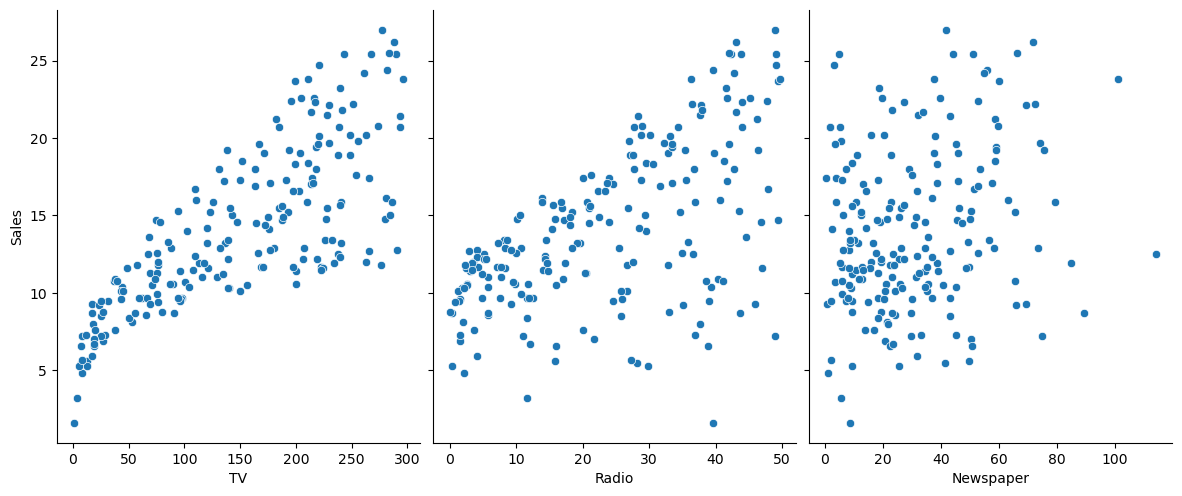

In [11]:
# Dette plot viser forholdet mellem reklameudgifterne på TV, Radio og Newspaper og salget. Hver punkt repræsenterer en observation (marked), hvor x-aksen er reklameudgifterne, og y-aksen er salget
sns.pairplot(data, x_vars=['TV', 'Radio','Newspaper'], y_vars='Sales', height=5, aspect=0.8)

c:\Users\denso\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


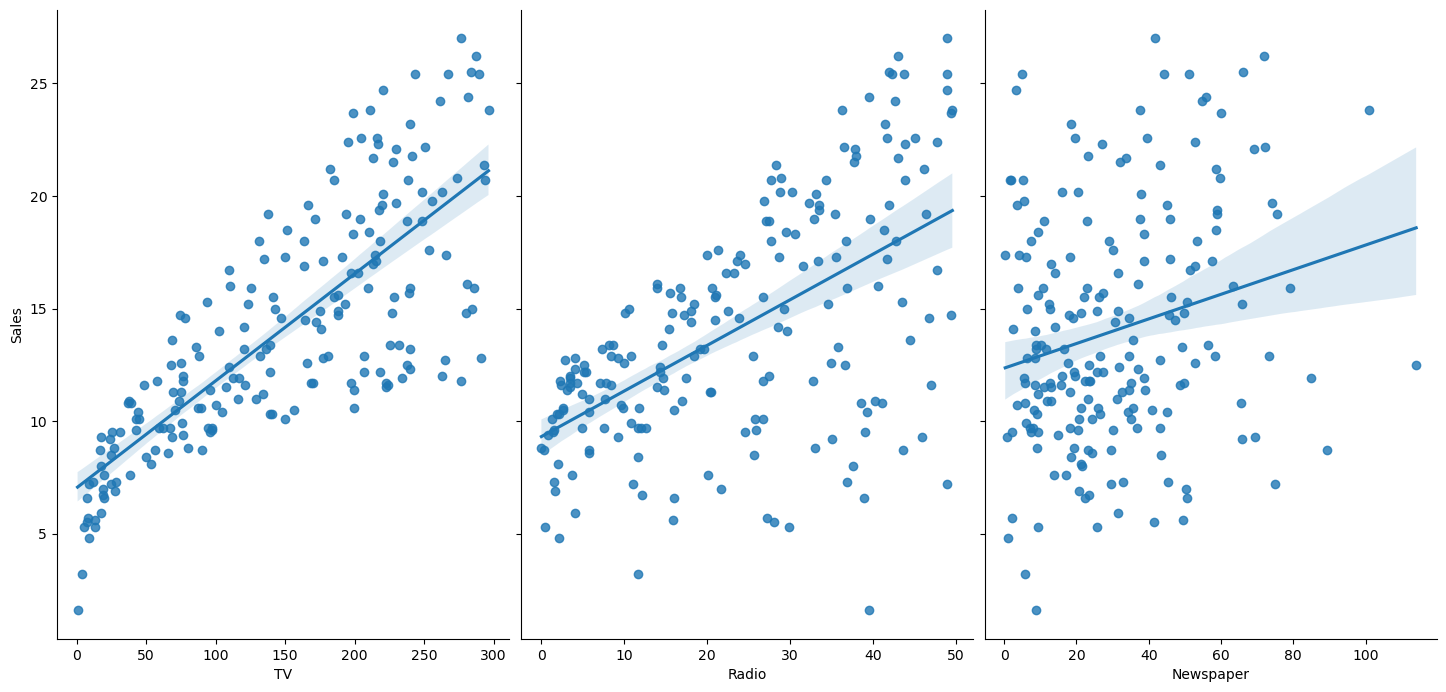

In [12]:
# Denne linje giver dig mulighed for visuelt at estimere den lineære sammenhæng mellem reklameudgifterne og salget.
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

## Step 3: Train a Model

### Multiple Linear Regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

### Preparing X and y 

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [8]:
# Opret en Python-liste over funktionernes navne
feature_cols = ['TV', 'Radio']

# Brug listen til at vælge en undermængde af det oprindelige datasæt
X = data[feature_cols]

# Udskriv de første 5 rækker
X.head()


,TV,Radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8


In [9]:
# check the type and shape of X
print(type(X))
print(X.shape)


<class 'pandas.core.frame.DataFrame'>
(200, 2)


In [13]:
# Vælg en Series fra DataFrame for y
y = data['Sales']

# Alternativ kommando, der virker, hvis der ikke er mellemrum i kolonnens navn
y = data.Sales

# Udskriv de første 5 værdier
y.head()


1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [14]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


### Splitting X and y into Training and Testing Sets

In [16]:
from sklearn.model_selection import train_test_split

# Opdel X og y i trænings- og testsæt
# random_state=1 sikrer, at opdelingen sker på samme måde hver gang for at opnå reproducerbare resultater
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


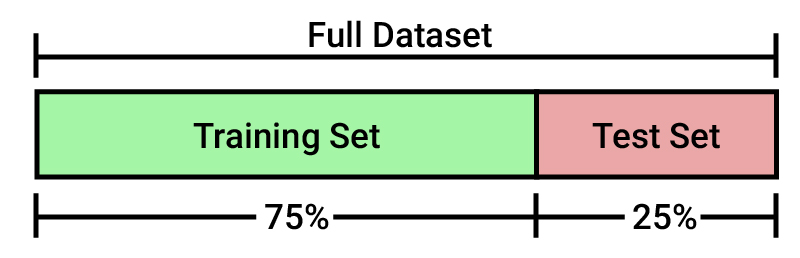

In [18]:
# default split 75:25
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 2)
(150,)
(50, 2)
(50,)


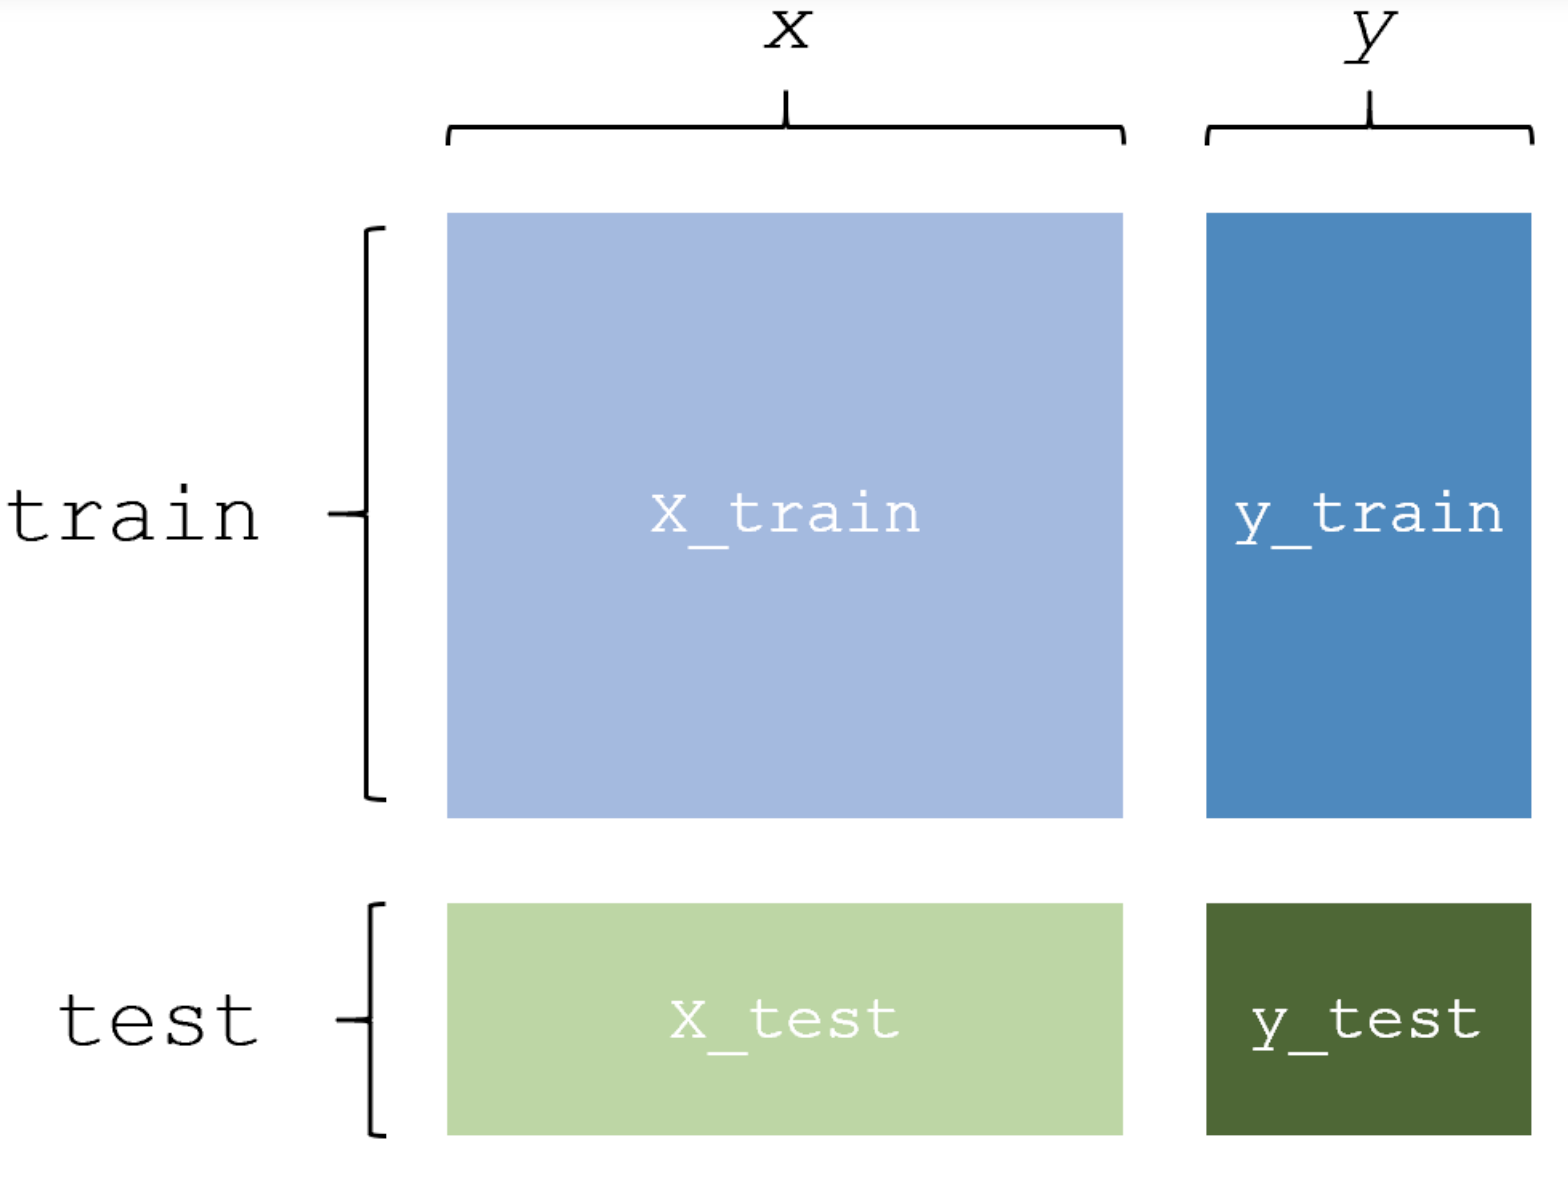

### Linear Regression by scikit-learn

In [19]:
# Opret en model
linreg = LinearRegression()

# Tilpas modellen til vores træningsdata
linreg.fit(X_train, y_train)

LinearRegression()

### Interpret Model Coefficients

In [20]:
# Udskriv interceptet (b0) og koefficienterne (bi)
print('b0 =', linreg.intercept_)
print('bi =', linreg.coef_)

b0 = 2.927237320266485
bi = [0.04660234 0.18117959]


b0 = 2.927237320266485
bi = [0.04660234 0.18117959]

Interceptet (b0 = 2.927237320266485): Dette er den forventede værdi af salget, når alle inputfunktionerne (TV- og Radio-reklameudgifter) er nul.Med andre ord, hvis der ikke er nogen reklameudgifter på hverken TV eller Radio, forventes salget at være omkring 2.93 tusind enheder.

Koefficienten for TV er cirka 0.0466. Det betyder, at for hver ekstra tusind dollars brugt på TV-reklame, forventes salget at stige med ca. 0.0466 tusind enheder, alt andet lige.
Koefficienten for Radio er cirka 0.1812. Det betyder, at for hver ekstra tusind dollars brugt på Radio-reklame, forventes salget at stige med ca. 0.1812 tusind enheder, alt andet lige.

In [21]:
# Denne kode kombinerer navnene på funktionerne med deres tilsvarende koefficienter ved hjælp af zip(
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04660234071076855), ('Radio', 0.18117959203112888)]

The result of the model fitting shows how the sales depend on the advertising:
$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$

Notes:
- This is a statement of **association**, not **causation**.
- If an increase in any ad spending was associated with a **decrease** in sales, $\beta_i$ would be **negative**.

Coefficients are estimated using the __least squares criterion__
We find mathematically the line, which minimizes the sum of squared residuals (or "sum of squared errors")

## Step 4: Testing the Model

In [ ]:
y_test

In [23]:
# # Foretag forudsigelser på testsættet (predictions)
y_predicted = linreg.predict(X_test)

In [25]:
y_predicted

array([21.73751851, 16.40451622,  7.64073276, 17.81512707, 18.6140367 ,
       23.75320401, 16.26267467, 13.30968011,  9.11623605, 17.24121988,
       14.37997584,  9.86630093, 17.28107008, 16.70455883, 14.93571851,
       15.47067849, 12.39847009, 17.21737409, 11.18626133, 18.09114847,
        9.34543641, 12.71804909,  8.75327159, 10.468843  , 11.34116649,
       14.98646893,  9.77329331, 19.43186663, 18.31005062, 17.14215851,
       21.62609193, 14.47149683, 16.3536012 , 12.27215653, 19.97488243,
       15.34878155, 13.90760851,  9.99030388, 20.98440888,  7.482353  ,
        3.61019982,  7.1944428 ,  5.99097416, 18.39958364,  8.35858094,
       14.12195436, 15.05074527, 20.38304162, 20.65191677, 19.47457534])

## Step 5: Model Evaluation Metrics

Instead, we need evaluation metrics designed for comparing continuous values.

The **three common evaluation metrics** for regression problems are:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
MAE er et mål for den gennemsnitlige afvigelse mellem de faktiske og forudsagte værdier. Med andre ord, det er den gennemsnitlige absolutte forskel mellem de faktiske salgsværdier og de salgsværdier, som vores model har forudsagt. Jo lavere MAE er, jo bedre passer vores model til dataene.

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [27]:
# calculate MAE using scikit-learn
from sklearn import metrics

In [28]:

# Den beregnede værdi, som du får, er det gennemsnitlige absolutte fejl (Mean Absolute Error - MAE) mellem de faktiske salgsværdier (y_test) og de forudsagte salgsværdier (y_predicted).
print(metrics.mean_absolute_error(y_test, y_predicted))

1.04775904112126


**Mean Squared Error** (MSE) is the mean of the squared errors:
MSE beregner gennemsnittet af kvadrerede forskelle mellem de faktiske og forudsagte værdier. Det kvadrerer forskellen mellem hver forudsagt værdi og den faktiske værdi, summer dem derefter og deler med antallet af observationer.

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [29]:
# beregner gennemsnittet af de kvadrerede forskelle mellem de faktiske og forudsagte værdier.
print(metrics.mean_squared_error(y_test, y_predicted))

1.9262760418667424


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
RMSE er kvadratroden af gennemsnittet af de kvadrerede forskelle mellem de faktiske og forudsagte værdier. Det er en populær metrisk for fejl, da den giver os en idé om den gennemsnitlige afvigelse mellem de faktiske og forudsagte værdier i den oprindelige enhed. Ligesom med MAE og MSE, er lavere værdier af RMSE bedre, da de indikerer, at modellen har mindre fejl.

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [30]:
# RMSE tager kvadratroden af MSE for at give os en værdi, der er på samme skala som den oprindelige responsvariabel.
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

1.3879034699382888


Comparing these metrics:

- **MAE** Er det gennemsnitlige absolutte fejl mellem de faktiske og forudsagte værdier. Det er nemt at forstå, da det blot er en gennemsnitlig fejl i samme enheder som responsvariablen.
- **MSE** Er gennemsnittet af de kvadrerede fejl. MSE er mere populært end MAE, da det giver større vægt til større fejl, hvilket kan være mere passende afhængigt af konteksten.
- **RMSE** Er kvadratroden af MSE og er på samme skala som responsvariablen. Det er derfor mere fortolkende i de oprindelige enheder og er ofte foretrukket for sin lette fortolkning.

### R-squared
Er et mål for, hvor godt den valgte model passer til dataene sammenlignet med en simpel gennemsnitlig model. En værdi på 1.0 angiver, at modellen forklarer al variationen i responsvariablen, mens lavere værdier angiver mindre forklaret variation.

In [31]:
# Explained variance (1 would be the best prediction)
eV = round(sm.explained_variance_score(y_test, y_predicted), 6)
print('Explained variance score ',eV )

Explained variance score  0.918149


In [33]:
# R-squared
r2_score(y_test, y_predicted)

0.9176214942248908

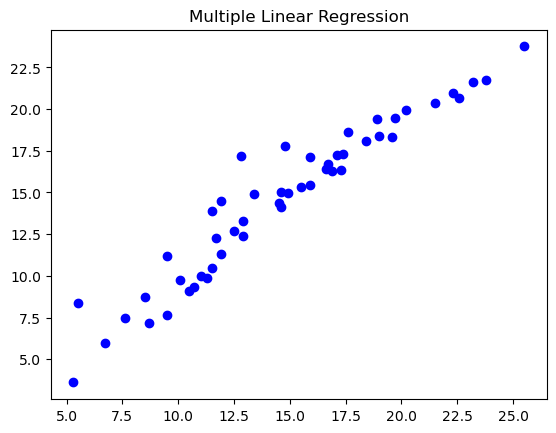

In [31]:
# Visualise the regression results
plt.title('Multiple Linear Regression')
plt.scatter(y_test, y_predicted, color='blue')
plt.show()

### Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was $50,000. What would we predict for the Sales in that market?

In [35]:
# sale = 2.92723 + 0.04660 * 50 
# sale

# resultat: 5.25723


# Beregn salget i det nye marked baseret på TV-reklameudgifterne
TV_advertising_spend = 50000
predicted_sale = linreg.intercept_ + linreg.coef_[0] * TV_advertising_spend

# Udskriv den forudsagte salgsværdi
print("Forudsagt salg i det nye marked:", predicted_sale)

Forudsagt salg i det nye marked: 2333.044272858694


In [41]:
# # the trained model
# X_new = pd.DataFrame({'TV': [50], 'Radio': [0]})
# sale = linreg.predict(X_new)
# sale

# resultat array([5.25735436])


# Opret en DataFrame med de nye reklameudgifter
X_new = pd.DataFrame({'TV': [50000], 'Radio': [0]})

# Forudsæt salget i det nye marked
predicted_sale = linreg.predict(X_new)

# Udskriv den forudsagte salgsværdi
print("Forudsagt salg i det nye marked:", predicted_sale[0])



Forudsagt salg i det nye marked: 2333.044272858694


 Begge metoder beregner den forudsagte salgsværdi i det nye marked, og resultatet er det samme: 2333.044272858694 tusind enheder.
 Det betyder, at uanset om du bruger direkte beregning baseret på modelens koefficienter eller bruger predict-metoden på den trænede model med nye data, vil du få det samme forudsagte salg. Dette giver bekræftelse på, at din model fungerer korrekt og konsistent.

### Can We Improve the Model by Feature Selection?

**Newspaper** has very low coeficient, we can try to remove it and evaluate the new regression again.

In [42]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_predicted = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

1.3879034699382888


Dette kode snippet forsøger at forbedre modellen ved at fjerne avisen (Newspaper) fra funktionerne og evaluere den nye regression igen. Resultatet af denne nye regression er en RMSE (Root Mean Squared Error) på ca. 1.388.

Dette betyder, at ved at fjerne avisen som en funktion, og kun bruge TV- og Radio-reklameudgifterne, opnår modellen stadig en rimelig god præstation med hensyn til at forudsige salget. Den nye model har en lignende præstationsmåling som den oprindelige model, hvilket indikerer, at avisen muligvis ikke bidrager signifikant til forudsigelserne.

The RMSE **decreased** when we removed Newspaper from the model. (Error is something we want to minimize, so **a lower number for RMSE is better**.)

In [43]:
# R-squared
k=r2_score(y_test, y_predicted)
k

0.9176214942248908

Dette R-squared score indikerer, at ca. 91.76% af variationen i responsvariablen (salget) kan forklares af de anvendte reklameudgifter (TV og Radio), når avisen fjernes som en funktion.
Det er en lignende R-squared score som den oprindelige model, hvilket tyder på, at den nye model opretholder en lignende præstationsniveau i forhold til at forudsige salget, selv efter at avisen er fjernet som en funktion

We are aiming at bigger R-squared, close to 1.00, so improvement is valued.

## Comparison of Models: AIC

Akaike information criterion (AIC) is a mathematical method for evaluating how well a model fits the data it was generated from. In statistics, AIC is used to compare different possible models and determine which one is the best fit for the data. AIC is calculated from:

- the number of independent variables used to build the model.
- the maximum likelihood estimate of the model (how well the model reproduces the data).

The best-fit model according to AIC is the one that explains the greatest amount of variation using the fewest possible independent variables.

AIC (Akaike Information Criterion) er en statistisk metode til at evaluere, hvor godt en model passer til de data, den blev genereret fra. AIC bruges til at sammenligne forskellige mulige modeller og bestemme, hvilken der er den bedste pasform for dataene. AIC beregnes ud fra:

antallet af uafhængige variabler, der blev brugt til at opbygge modellen.
den maksimale likelihood-estimat af modellen (hvor godt modellen reproducerer dataene).
Den bedst tilpassede model ifølge AIC er den, der forklarer den største mængde variation ved hjælp af færrest mulige uafhængige variabler.

Det er en nyttig metode til at sammenligne modeller og identificere den mest passende model til et givet datasæt. Lavere AIC-værdier indikerer normalt en bedre modelpasning, når man sammenligner modeller.


The formula for AIC is:

    AIC = 2K - 2ln(L)
    
- K is the number of independent variables used
- L is the log-likelihood estimate (a.k.a. the likelihood that the model could have produced your observed y-values). <br>
The default K is always 2, so if your model uses one independent variable your K will be 3, if it uses two independent variables your K will be 4, and so on.<br>

K er antallet af uafhængige variabler brugt i modellen.
L er log-likelihood-estimatet (likelihood at modellen kunne have produceret dine observerede 
y-værdier).
Standarden for 
K er altid 2, så hvis din model bruger én uafhængig variabel, vil 
K være 3, hvis den bruger to uafhængige variabler, vil 
K være 4, og så videre.

To compare models using AIC, you need to calculate the AIC of each model. If a model is more than 2 AIC units lower than another, then it is considered significantly better than that model.
Source: https://www.scribbr.com/statistics/akaike-information-criterion/_

We use the __OLS()__ function from the __statsmodels__ library

In [44]:
import statsmodels.api as sm

In [56]:
def olsi(data, f_cols):
    X = data[f_cols]
    y = data['Sales']
    X = sm.add_constant(X)
    #fit linear regression model
    model = sm.OLS(y, X).fit()
    return model

In [57]:
feature_cols = ['TV', 'Newspaper']


In [58]:
feature_cols = ['TV', 'Newspaper', 'Radio']

In [59]:
model = olsi(data, feature_cols)

In [60]:
# view AIC of the model - lower is better
model.aic

780.3622358887662

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           1.58e-96
Time:                        11:18:02   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation of Coeficients

- __R-squared__ is known as the _coefficient of determination_. It is the proportion of the variance in the dependant variable that can be explained by the predictor variables (the errors we know exist).
- __Ho__ - null hypothesis: Sales doesn't depend on predictors, aall coeficients are 0; __Ha__ states the oposite.
- __F-statistic__ is overall measure of the model, used for rejecting or not the null hypothesis.
- __Prob (F-statistic)__ is __p-value__, compared to a common value of 0.05. Smaller p-value - more probable Ho is to be rejected.
- __P>|t|__ - individual __p-value__ for each predictor - tells how significant it is.

## Resources

- [An Introduction to Statistical Learning](https://www.statlearning.com/) and [related videos](https://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) 
- [Introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm)
-  https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
